In [ ]:
In this section we will be working through linear regression with the following steps:

Step 1: Getting ad setting up the data.
Step 2: Visualizing current data.
Step 3: The mathematics behind the Least Squares Method.
Step 4: Using Numpy fr a Univariate Linear Regression.
Step 5: Getting the error.
Step 6: Using scikit learn to implement a multivariate regression.
Step 7: Using Training andd Validation.  
Step 8: Predicting Prices
Step 9 : Residual Plots

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()


In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

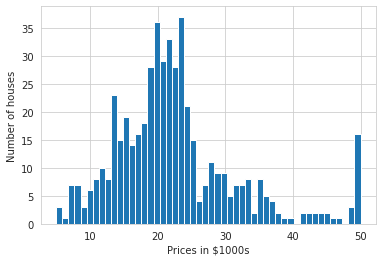

In [8]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of room')

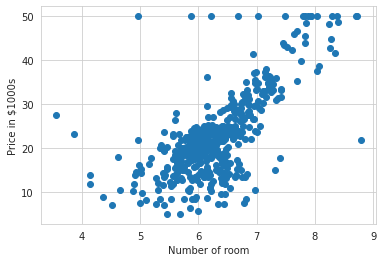

In [9]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of room')

In [10]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


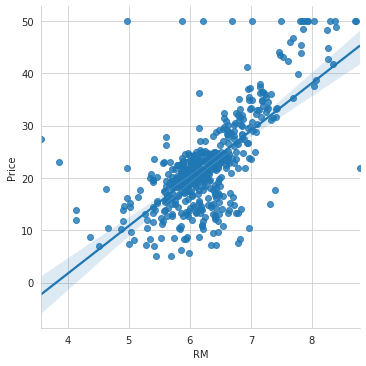

In [12]:
sns.lmplot(x='RM',y='Price',data=boston_df)

In [14]:
#The mathemathics behind the least square method
# Using Numpy fr a Univariate Linear Regression.

In [38]:
X = boston_df.RM
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [39]:
X = np.vstack(boston_df.RM)
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [40]:
X.shape

(506, 1)

In [41]:
Y = boston_df.Price

In [87]:
# Create the X array in the form [X 1]
# Make the array shape to x, 1 for multiplication
X = np.array([[value,float(1)] for value in X ]) 
X = X.astype(np.float64)


<ipython-input-87-6c19a8625af5>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array([[value,float(1)] for value in X ])


ValueError: setting an array element with a sequence.

In [88]:
X

array([[array([array([array([array([array([array([array([array([6.575]), 1], dtype=object), 1], dtype=object),
       1.0], dtype=object),
       1.0], dtype=object),
       1.0], dtype=object),
       1], dtype=object),
       1], dtype=object),
        1.0],
       [array([array([array([array([array([array([array([array([6.421]), 1], dtype=object), 1], dtype=object),
       1.0], dtype=object),
       1.0], dtype=object),
       1.0], dtype=object),
       1], dtype=object),
       1], dtype=object),
        1.0],
       [array([array([array([array([array([array([array([array([7.185]), 1], dtype=object), 1], dtype=object),
       1.0], dtype=object),
       1.0], dtype=object),
       1.0], dtype=object),
       1], dtype=object),
       1], dtype=object),
        1.0],
       ...,
       [array([array([array([array([array([array([array([array([6.976]), 1], dtype=object), 1], dtype=object),
       1.0], dtype=object),
       1.0], dtype=object),
       1.0], dtype=object),
       1],

In [89]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y,rcond=None)[0]

TypeError: No loop matching the specified signature and casting was found for ufunc lstsq_n

In [90]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
sns.set_style('whitegrid')
%matplotlib inline

boston = load_boston()
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target

# Set up X as median room values
X = boston_df.RM

# Use vstack to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

# Make the array shape to x, 1 for multiplication
# Make the array shape to x, 1 for multiplication
X = np.array([[value,float(1)] for value in X ]) 
X = X.astype(np.float64)

# Get m and b values for best fit line
m, b = np.linalg.lstsq(X, Y, rcond=None)[0]  # This line causes the error

<ipython-input-90-dcb2e795550c>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array([[value,float(1)] for value in X ])


In [92]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

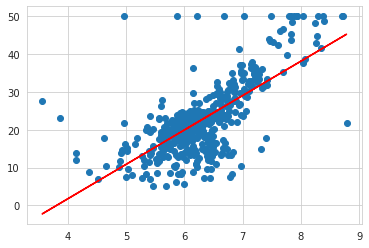

In [100]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x = boston_df.RM

plt.plot(x,m*x + b,'r',label='Best Fit Line')

In [101]:
#Getting the error


In [104]:
result = np.linalg.lstsq(X,Y,rcond=None)

error_total = result[1]

rnse = np.sqrt(error_total/len(X))

print('The root mean squared error was %.2f' %rnse)

The root mean squared error was 6.60


In [105]:
import sklearn
from sklearn.linear_model import LinearRegression

In [106]:
lreg = LinearRegression()

In [107]:
x_multi = boston_df.drop('Price',1)

y_target = boston_df.Price

In [108]:
lreg.fit(x_multi,y_target)

LinearRegression()

In [112]:
print('The estimated intercept coeficient is %.2f ' % lreg.intercept_)

print('The number of coefficients used was %d ' %len(lreg.coef_))

The estimated intercept coeficient is 36.46 
The number of coefficients used was 13 


In [113]:
coeff_df = DataFrame(boston_df.columns)

coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [114]:
# Using Training and Validation

In [144]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [145]:
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [146]:
lreg = LinearRegression()


lreg.fit(X_train,Y_train)

LinearRegression()

In [147]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [151]:
print('Fit a model X_train, and calculate the MSE with Y_train: %.2f ' %np.mean(Y_train - pred_train)**2)

print('Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f ' %np.mean(Y_test - pred_test)**2)

Fit a model X_train, and calculate the MSE with Y_train: 0.00 
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.38 


Text(0.5, 1.0, 'Residual Plot')

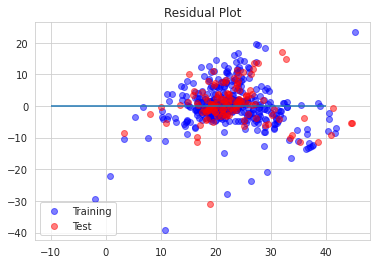

In [159]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=40)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plot')

<AxesSubplot:xlabel='RM', ylabel='Price'>

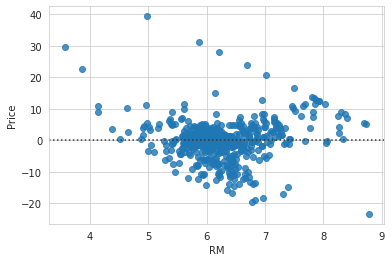

In [157]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)
